In [1]:
from utils import augment
from utils.augment import *

import jax.numpy as jnp
import jax
import flax.linen as nn
import numpy as np
import random
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from utils.dataloader import mel_dataset

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = mel_dataset('/mnt/disks/sdb/dataset', 'total')

Load song_meta.json...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 707989/707989 [00:00<00:00, 726251.50it/s]


Load complete!

Load file list...


710it [01:03, 11.10it/s]


In [3]:
mix = MixupBYOLA()
crop = RandomResizeCrop()

In [21]:
def collate_batch(batch):
    x_train_1 = []
    x_train_2 = []
    
    for x, y in batch:
        x = (np.array(x)+127)/100
        x = np.expand_dims(x, axis=-1)
        x = crop(mix(x))        
        x_train_1.append(x)
        
    for x, y in batch:
        x = (np.array(x)+127)/100
        x = np.expand_dims(x, axis=-1)
        x = crop(mix(x))        
        x_train_2.append(x)
            
    y_train = [y for _, y in batch]           
    return augment.post_norm(np.stack(x_train_1 + x_train_2, axis=0)), np.array(y_train)

In [22]:
dataset_size = len(data)
train_size = int(dataset_size * 0.8)    
test_size = dataset_size - train_size

train_dataset, test_dataset, = random_split(data, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=0, collate_fn=collate_batch)

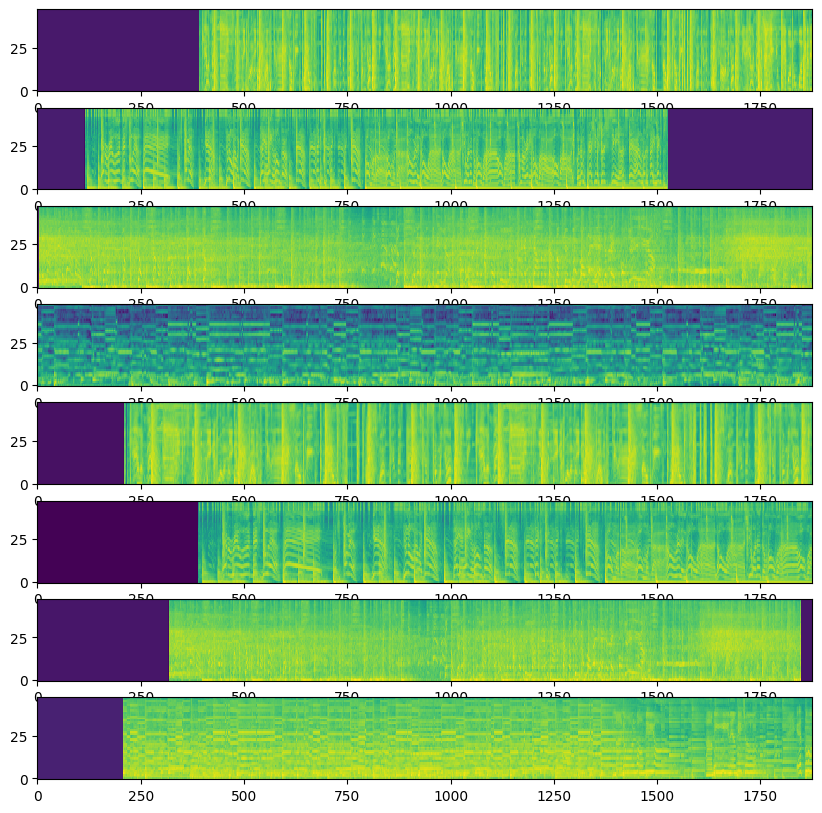

In [24]:
fig, ax = plt.subplots(8, figsize=(10,10))

for n, i in enumerate(next(iter(train_dataloader))[0]):
    ax[n].imshow(i, aspect='auto', origin='lower', interpolation='none')
    


In [15]:
%%timeit
a = next(train_iter)

1.12 s ± 54.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
